In [1]:
# Import the required libraries and dependencies:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [2]:
# EVALUATING RISK AND RETURN: THE SHARPE RATIO
# As a quantitative analyst in the fintech industry, you need to not only evaluate risk of an investment, but also examine that risk in relation to the potential reward.
# Let's say that two assets have the same risk profile and the same annualized standard deviation.
# However, one asset has the potential of returning 10% on its investment, and the other has the potential of returning 25%.
# If you consider just the standard deviations without knowing the potential returns, you might think that the choice between the two assets is a toss-up.
# If you know the potential returns, you'll likely choose the asset with the potential of 25%.
# The SHARPE RATIO is a metric that helps quantify both the risk and the potential reward of a particular investment.
# The Sharpe Ratio assesses risk and reward by measuring the excess return (that is, the reward, or profit) for the risk that someone assumes when investing in the asset.

In [3]:
# CALCULATE THE SHARPE RATIO
# To calculate the Sharpe Ratio for an investment, we first subtract the risk-free rate of that invesment form its annual average return.
# We then divide the result by the annualized standard deviation of the investment's return.
# The formula for the Sharpe Ratio is Rp - Rf / Annualized standard deviation
    # Rp: Annualized average return of portfolio
    # Rf: The risk-free rate
    # Annualized Standard Deviation
# The RISK-FREE RATE OF RETURN is the return on an investment with zero risks - that is, it's the return that investors can expect for taking no risk.
# The greater the value of the Sharpe Ratio, the more attractive the risk-adjusted return for that asset is.
# the Sharpe Ratio can help investors judge whether an asset offers a solid investment decision.

In [8]:
# CALCULATE THE DAILY RETURNS
# To understand how the Sharpe Ratio works, we'll use two portfolios:
    # Portfolio A
    # Portfolio B
# Each portfolio contains stocks from tech companies:
# Use the read_csv function and Path module to import the CSV file:
portfolio_a = pd.read_csv(
    Path('tech_stocks_2018_a.csv'),
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True
)

portfolio_b = pd.read_csv(
    Path('tech_stocks_2018_b.csv'),
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True,
)

# Display the first five rows of data for Portfolios A and B
print("Portfolio A Data")
display(portfolio_a.head())

print("-------------")

print("Portfolio B Data")
display(portfolio_b.head())

Portfolio A Data


,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-08-22,215.05,107.06,1207.33,173.640,1904.90
2018-08-23,215.49,107.56,1205.38,172.900,1902.90
2018-08-24,216.16,108.40,1220.65,174.645,1905.39
2018-08-27,217.94,109.60,1241.82,177.460,1927.68
2018-08-28,219.70,110.26,1231.15,176.260,1932.82


-------------
Portfolio B Data


,SNE,AMD,TWTR,IBM,MU
Date,,,,,
2018-08-22,54.62,20.9,33.81,145.24,50.24
2018-08-23,54.41,22.29,33.88,145.37,49.70
2018-08-24,54.54,23.98,34.28,146.04,50.70
2018-08-27,56.02,25.26,35.89,146.69,52.07
2018-08-28,55.77,25.05,35.49,146.59,52.34


In [7]:
# The goal is to use the Sharpe Ratio to assess whether a single portfolio that combines Portfolio A with Portfolio B is a good investment option.
# Because we want to evaluate the combination of portfolios, the first step is to combine the two DataFrames.
# We just happen to have a CSV file with the combined data.
# The following code imports this file into the `portfolio_a_b` DataFrame and then displays the first five rows of the data:
# Use the read_csv function and Path module to import the combination of Portfolio A and Portfolio B:
portfolio_a_b = pd.read_csv(
    Path('tech_stocks_a_b.csv'),
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True
)

# Display the first five rows of data
print('Portfolios A & B Combined')
display(portfolio_a_b.head())

Portfolios A & B Combined


,AAPL,MSFT,GOOG,FB,AMZN,SNE,AMD,TWTR,IBM,MU
Date,,,,,,,,,,
2018-08-22,215.05,107.06,1207.33,173.640,1904.90,54.62,20.90,33.81,145.24,50.24
2018-08-23,215.49,107.56,1205.38,172.900,1902.90,54.41,22.29,33.88,145.37,49.70
2018-08-24,216.16,108.40,1220.65,174.645,1905.39,54.54,23.98,34.28,146.04,50.70
2018-08-27,217.94,109.60,1241.82,177.460,1927.68,56.02,25.26,35.89,146.69,52.07
2018-08-28,219.70,110.26,1231.15,176.260,1932.82,55.77,25.05,35.49,146.59,52.34


In [9]:
# Now we want to generate the daily return data from this DataFrame using `pct_change`:
daily_returns_ab = portfolio_a_b.pct_change().dropna()

# Review the results
daily_returns_ab.head()

,AAPL,MSFT,GOOG,FB,AMZN,SNE,AMD,TWTR,IBM,MU
Date,,,,,,,,,,
2018-08-23,0.002046,0.004670,-0.001615,-0.004262,-0.001050,-0.003845,0.066507,0.002070,0.000895,-0.010748
2018-08-24,0.003109,0.007810,0.012668,0.010093,0.001309,0.002389,0.075819,0.011806,0.004609,0.020121
2018-08-27,0.008235,0.011070,0.017343,0.016118,0.011698,0.027136,0.053378,0.046966,0.004451,0.027022
2018-08-28,0.008076,0.006022,-0.008592,-0.006762,0.002666,-0.004463,-0.008314,-0.011145,-0.000682,0.005185
2018-08-29,0.014929,0.015962,0.014742,-0.002042,0.033774,0.023310,0.005988,-0.003945,0.006481,-0.009744


In [20]:
# Let's calculate the annualized returns by creating a variable called `year_trading_days`:
year_trading_days = 252
average_annual_returns_ab = daily_returns_ab.mean() * year_trading_days

# Review the results:
average_annual_return_ab

AAPL   -0.007914
MSFT    0.255939
GOOG   -0.004754
FB      0.078757
AMZN   -0.021745
SNE     0.034798
AMD     0.592410
TWTR    0.304347
IBM    -0.083394
MU     -0.041568
dtype: float64

In [21]:
# Now that the daily returns for all the stocks have been calculated, let's find the standard deviation using the `std` function:
std_ab = daily_returns_ab.std().sort_values()

# Review the results:
std_ab.head(10)

IBM     0.015633
MSFT    0.016924
GOOG    0.018487
SNE     0.019790
AAPL    0.020174
FB      0.021032
AMZN    0.022451
TWTR    0.029965
MU      0.030300
AMD     0.044514
dtype: float64

In [22]:
# Now let's calculate the annualized standard deviation:
annualized_std_ab = daily_returns_ab.std() * np.sqrt(year_trading_days)

# Review the annualized standard deviation:
annualized_std_ab

AAPL    0.320247
MSFT    0.268657
GOOG    0.293467
FB      0.333875
AMZN    0.356391
SNE     0.314162
AMD     0.706632
TWTR    0.475679
IBM     0.248172
MU      0.480990
dtype: float64

In [28]:
# CALCULATE AND SORT THE SHARPE RATIOS
# To calculate the Sharpe Ratio of an asset, we divide the average annualized asset return by the annualized standard deviation:
sharpe_ratios_ab = average_annual_returns_ab / annualized_std_ab

# Review and sort the Sharpe Ratio results:
sharpe_ratios_ab.sort_values()

IBM    -0.336033
MU     -0.086421
AMZN   -0.061014
AAPL   -0.024712
GOOG   -0.016201
SNE     0.110764
FB      0.235889
TWTR    0.639816
AMD     0.838357
MSFT    0.952660
dtype: float64

In [27]:
# SHARPE RATIO SUMMARY:
# What these values reveal, is that IBM's ratio has the worst risk-return profile of the group.
# By comparison, MSFT has the best risk-return profile.
# This means that MSFT offers a considerablly better investment opportunity than IBM.

<AxesSubplot:>

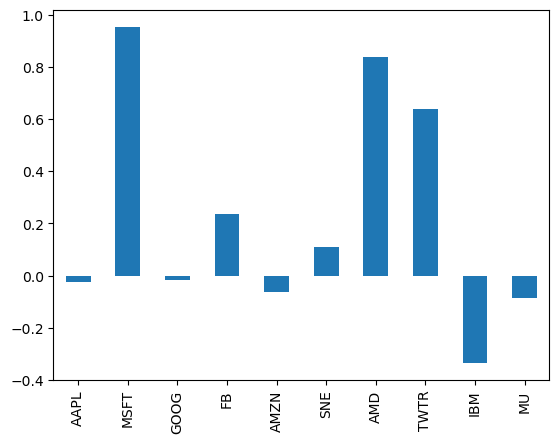

In [31]:
# PLOT THE SHARPE RATIOS:
# To visualize these results, we'll use a bar plot:
sharpe_ratios_ab.plot.bar()

In [ ]:
# SHARPE RATIO PLOT SUMMARY:
# While the plot doesn't change the overall analysis, it does display the differences and relationships among the stocks.